**Analysis of Request For Quote (RFQ) data for customer Mitsubishi and Lazard** \
Data is obtained from the blotter function (BLT) in BB. 

In [ ]:
pip install plotly==4.7.1

     |████████████████████████████████| 11.5MB 7.6MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Import of the .csv file contaning RFQ data. 

import pandas as pd
import numpy as np


rfq = pd.read_csv('https://raw.githubusercontent.com/LarsBryld/auctions/master/bfm492D.csv', sep=',', parse_dates=True, dayfirst=False, skiprows=2)



In [ ]:
# Creating 
rfq['Second'] = pd.DatetimeIndex(rfq['Exec Time']).second
rfq['Minute'] = pd.DatetimeIndex(rfq['Exec Time']).minute
rfq['Hour'] = pd.DatetimeIndex(rfq['Exec Time']).hour
rfq['Day'] = pd.DatetimeIndex(rfq['Trade Dt']).day
rfq['Month'] = pd.DatetimeIndex(rfq['Trade Dt']).month
rfq['Year'] = pd.DatetimeIndex(rfq['Trade Dt']).year  
rfq['Source'] = 'RFQ'

# Creating date variable used for plotting
rfq['Date'] = pd.to_datetime(rfq['Trade Dt'], format='%d/%m/%Y')
rfq['WeekDay'] = rfq['Date'].dt.day_name()
rfq['MonthName'] = rfq['Date'].dt.month_name()

#Calculating days to maturity and rounding result 
rfq['Maturity'] = (pd.to_datetime(rfq['Mat Dt'], format='%d/%m/%Y') - rfq['Date']) / np.timedelta64(1,'D') / 365
rfq['Maturity'] = rfq['Maturity'].round(1)

import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'colab'

#import plotly.graph_objects as go
#fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
#fig.show()


#Create inverted price measure 
rfq.loc[rfq['Side'] == 'B', 'PriceDiff'] = (rfq['CBBT Mid Prc'] - rfq['Price']) 
rfq.loc[rfq['Side'] == 'S', 'PriceDiff'] = (rfq['Price'] - rfq['CBBT Mid Prc'])


# Create inverted price dummy 
rfq.loc[rfq['PriceDiff'] < 0, 'PriceDiffDummy'] = 'Inverted'
rfq.loc[rfq['PriceDiff'] > 0, 'PriceDiffDummy'] = 'Non-Inverted'
rfq.loc[rfq['PriceDiff'] == 0, 'PriceDiffDummy'] = 'Non-Inverted'


# away from mid volume  
rfq.loc[rfq['PriceDiffDummy'] == 1, 'VolumenAwayFromMid'] = (rfq['Quantity'] * rfq['PriceDiff'] * 1)
rfq.loc[rfq['PriceDiffDummy'] == 0, 'VolumenAwayFromMid'] = (rfq['Quantity'] * rfq['PriceDiff'] * 1)

rfq.loc[rfq['Status'].isin(['AllocSent', 'Accepted', 'AllocSave', 'AllocAcpt']), 'Status2'] = ('Accepted')
rfq.loc[rfq['Status'].isin(['Tie-TW', 'Covered']), 'Status2'] = ('Covered')
rfq.loc[rfq['Status'].isin(['TrAway', 'Passed', 'C/Expire', 'D/Expire', 'Rejected', 'Corrected', 'Cancel', 'C/Cancel', 'AllocCanc']), 'Status2'] = ('TrAway')




In [ ]:
# Checking for nan and null in response time, quantity and inverted prices variable
null_rows_q = rfq[rfq['Quantity'].isnull()]
nan_rows_q = rfq[rfq['Quantity'].isna()]

null_rows_rs = rfq[rfq['Rspns Time MS'].isnull()]
nan_rows_rs = rfq[rfq['Rspns Time MS'].isna()]

null_rows_inv = rfq[rfq['PriceDiffDummy'].isnull()]
nan_rows_inv = rfq[rfq['PriceDiffDummy'].isna()]


print('Number of isnull & is na observation in "Quantity" is {} & {} respectivly. '.format(len(null_rows_q), len(nan_rows_q)))
print('Number of isnull & is na observation in "Response Time" is {} & {} respectivly. '.format(len(null_rows_rs), len(nan_rows_rs)))
print('Number of isnull & is na observation in "Inverted Price" variable is {} & {} respectivly. Entire df is {} '.format(len(null_rows_inv), len(nan_rows_inv), len(rfq)))



#
print('Total number of rows with TS Book Name = Depo is {}'.format(len(rfq[rfq['TS Book Name'] == 'DEPO'])))
print('Unique books in RFQ data {}'.format(pd.unique(rfq['TS Book Name'])))



Number of isnull & is na observation in "Quantity" is 0 & 0 respectivly. 
Number of isnull & is na observation in "Response Time" is 0 & 0 respectivly. 
Number of isnull & is na observation in "Inverted Price" variable is 4157 & 4157 respectivly. Entire df is 14181 
Total number of rows with TS Book Name = Depo is 0
Unique books in RFQ data ['STAT' 'FLEX' 'REAL' 'EUR' 'ILLIKVID' nan 'INFLATIO' 'FLOAT' 'SCAND'
 'EURCOV' 'PFAND']


In [ ]:

# Removing Depo book from the RFQ data set since it creates issues with Nan & Null
#rfq = rfq[rfq['TS Book Name'].isin(['STAT', 'FLEX', 'REAL', 'ILLIKVID', 'FLOAT', 'INFLATIO'])]

# Checking for nan and null in response time, quantity and inverted prices variable
null_rows_q = rfq[rfq['Quantity'].isnull()]
nan_rows_q = rfq[rfq['Quantity'].isna()]

null_rows_rs = rfq[rfq['Rspns Time MS'].isnull()]
nan_rows_rs = rfq[rfq['Rspns Time MS'].isna()]

null_rows_inv = rfq[rfq['PriceDiffDummy'].isnull()]
nan_rows_inv = rfq[rfq['PriceDiffDummy'].isna()]

nan_rows_book = rfq[rfq['TS Book Name'].isna()]

nan_rows_cbbt = rfq[rfq['CBBT Mid Prc'].isna()]

#print('Number of isnull & is na observation in "Quantity" is {} & {} respectivly after removing Depo book. '.format(len(null_rows_q), len(nan_rows_q)))
#print('Number of isnull & is na observation in "Response Time" is {} & {} respectivly after removing Depo book. '.format(len(null_rows_rs), len(nan_rows_rs)))
#print('Number of isnull & is na observation in "Inverted Price" variable is {} & {} respectivly after removing Depo book. Total len in df {} '.format(len(null_rows_inv), len(nan_rows_inv), len(rfq)))

print(pd.unique(nan_rows_cbbt['TS Book Name']))


nan_rows_cbbt.head(5)

nan_rows_book

['FLEX' 'REAL' 'FLOAT' nan 'ILLIKVID' 'STAT' 'INFLATIO' 'EURCOV' 'PFAND'
 'EUR' 'SCAND']


,MIC Code,Trade Dt,Time,Exec Time,Security,ISIN,Pricing Source,Side,Quantity,Price,Status,Cust Acct,Customer,C/Name,DlrsCmp,Cover,PNT,SalesName,Trader Name,TS Book Name,Yield,SetDt,Rspns Time MS,Mat Dt,CBBT Bid Prc,CBBT Mid Prc,CBBT Ask Prc,TVTIC,ClientLEI,Dealer SI,NonInv,DNotes,Second,Minute,Hour,Day,Month,Year,Source,Date,WeekDay,MonthName,Maturity,PriceDiff,PriceDiffDummy,VolumenAwayFromMid,Status2
20,BMTF,04/01/2021,09:20:58,09:21:47,DGB 4 1/2 11/15/39,DK0009922320,1191,B,1.810000e+06,NaN,TrAway,BC_BR,"BLACKROCK INTERNATIONAL, LIMITED",ROBERT GULDEN,7.0,--,No,MORTEN ANDERSEN,NaN,NaN,NaN,05/01/2021,48841,15/11/1939,191.585968,192.054573,192.523178,ROEJDDAXM6BBG0000000000B5FF2CFEADE040006,5493008YUGP5E01IBD70,NaN,NaN,NaN,47.0,21.0,9.0,1,4,2021,RFQ,2021-01-04,Monday,January,-81.2,NaN,NaN,NaN,TrAway
21,BMTF,04/01/2021,09:20:57,09:21:50,DGB 0 1/4 11/15/52 30Y,DK0009924029,1191,B,2.640000e+06,NaN,TrAway,BC_BR,"BLACKROCK INTERNATIONAL, LIMITED",ROBERT GULDEN,5.0,--,No,MORTEN ANDERSEN,NaN,NaN,NaN,05/01/2021,53266,15/11/1952,109.808991,110.191567,110.574143,ROEJDDAXM6BBG0000000000B5FF2CFE9DE04000A,5493008YUGP5E01IBD70,NaN,NaN,NaN,50.0,21.0,9.0,1,4,2021,RFQ,2021-01-04,Monday,January,-68.2,NaN,NaN,NaN,TrAway
23,BMTF,30/12/2020,17:09:41,17:10:04,DGB 0 1/2 11/15/29 10YR,DK0009923807,1191,B,2.000000e+06,NaN,TrAway,AHV_GENF,COMPENSWISS FONDS DE COMP AVS AI APG,ANDI KABILI,3.0,--,No,BJOERN MARCEL PETERS,NaN,NaN,NaN,05/01/2021,23139,15/11/2029,108.601532,108.742859,108.884186,ROEJDDAXM6BBG0000000000B5FECA645D90C0003,549300FHVWCQCQH3ZQ94,NaN,NaN,NaN,4.0,10.0,17.0,30,12,2020,RFQ,2020-12-30,Wednesday,December,8.9,NaN,NaN,NaN,TrAway
36,BMTF,30/12/2020,15:32:56,15:33:39,DGB 4 1/2 11/15/39,DK0009922320,1191,S,4.930000e+06,NaN,TrAway,BC_BR,"BLACKROCK INTERNATIONAL, LIMITED",ROBERT GULDEN,5.0,--,No,MORTEN ANDERSEN,NaN,NaN,NaN,05/01/2021,43253,15/11/1939,191.410538,191.684364,191.958191,ROEJDDAXM6BBG0000000000B5FEC8F98E0300003,5493008YUGP5E01IBD70,NaN,NaN,NaN,39.0,33.0,15.0,30,12,2020,RFQ,2020-12-30,Wednesday,December,-81.2,NaN,NaN,NaN,TrAway
39,BMTF,30/12/2020,15:31:13,15:31:56,DGB 3 11/15/21,DK0009922676,1191,S,6.000000e+06,NaN,TrAway,BC_BR,"BLACKROCK INTERNATIONAL, LIMITED",ROBERT GULDEN,5.0,--,No,MORTEN ANDERSEN,NaN,NaN,NaN,05/01/2021,42798,15/11/2021,103.066254,103.110252,103.154251,ROEJDDAXM6BBG0000000000B5FEC8F31E0300005,5493008YUGP5E01IBD70,NaN,NaN,NaN,56.0,31.0,15.0,30,12,2020,RFQ,2020-12-30,Wednesday,December,0.9,NaN,NaN,NaN,TrAway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14108,BMTF,02/01/2020,14:22:21,14:22:51,NDASS 2 01/01/21 . .,DK0002033943,1194,B,2.500000e+06,NaN,TrAway,NYKREDIT_A,"NYKREDIT REALKREDIT A/S, FINANS",KIM BRODERSEN,3.0,--,No,OLE VIXOE,NaN,NaN,NaN,06/01/2020,29111,01/01/2021,NaN,NaN,NaN,ROEJDDAXM6BBG0000000000B5E0DEE8DC72C0019,LIU16F6VZJSD6UKHD557,NaN,NaN,NaN,51.0,22.0,14.0,1,2,2020,RFQ,2020-01-02,Thursday,January,1.0,NaN,NaN,NaN,TrAway
14117,BTFE,02/01/2020,13:59:35,14:00:33,RDKRE 1 04/01/21 10f,DK0004607454,1194,B,4.096894e+08,NaN,TrAway,BC_NIM,NORDEA INVESTMENT MANAGEMENT AB,ANUJ THAKUR,4.0,--,No,OLE TROEST NISSEN,NaN,NaN,NaN,06/01/2020,57474,01/04/2021,NaN,NaN,NaN,QBKK4WBSO3BBG0000000000B5E0DE937C72C003B,549300PHQH3Q74O5YT52,NaN,*,NaN,33.0,0.0,14.0,1,2,2020,RFQ,2020-01-02,Thursday,January,1.2,NaN,NaN,NaN,TrAway
14128,XOFF,02/01/2020,13:02:29,13:02:49,NDASS 2 10/01/47 cc2,DK0002032978,1194,S,2.351760e+05,NaN,TrAway,UBSL_FINSB,UBS SWITZERLAND AG,PASCAL BERTRAND,3.0,--,No,BJOERN MARCEL PETERS,NaN,NaN,NaN,06/01/2020,19793,01/10/1947,103.806702,104.073357,104.340012,1KJTIIGC8YBBG0000000000B5E0DDBD5BE18001C,549300WOIFUSNYH0FL22,NaN,NaN,NaN,49.0,2.0,13.0,1,2,2020,RFQ,2020-01-02,Thursday,January,-72.3,NaN,NaN,NaN,TrAway
14160,BTFE,02/01/2020,10:50:37,10:51:06,NYKRE Float 10/01/38 43d,DK0009761561,1197,S,1.477637e+06,NaN,TrAway,BC_NIM,NORDEA INVESTMENT MANAGEMENT AB,FLEMMING TH

In [ ]:
rfq_test = rfq[rfq['TS Book Name'].isin(['STAT', 'FLEX', 'REAL', 'ILLIKVID', 'FLOAT', 'INFLATIO'])]

pd.unique(rfq_test['PNT'])

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
print('{} Perp observations has to be removed with Maturity > 100 '.format(len(rfq[rfq['Maturity'] > 100])))
print('{} observations has to be removed with Yield > 100 '.format(len(rfq[rfq['Yield'] > 100])))


0 Perp observations has to be removed with Maturity > 100 
1 observations has to be removed with Yield > 100 


In [ ]:
#removing Perp bonds from Data set
rfq = rfq[rfq['Maturity'] < 100]

#removing Perp bonds from Data set
rfq = rfq[rfq['Yield'] < 100 ]

#removing bonds from Data set with price > 200 
rfq = rfq[rfq['Price'] < 200 ]

rfq = rfq[rfq['PriceDiff'] < 9 ]


#Reducing the rfq df to be of one year dimension
rfq = rfq[rfq['Date']> max(rfq['Date']) - pd.DateOffset(years=1)]
print('Latest date in main RFQ data set is {:%d-%b-%Y}. Earliest date is {:%d-%b-%Y}'.format(max(rfq['Date']), min(rfq['Date'])))


#changing nan in dls comp to zeros
rfq['DlrsCmp'].fillna(0, inplace=True)

real = rfq[rfq['TS Book Name'] == 'REAL']

Latest date in main RFQ data set is 04-Jan-2021. Earliest date is 06-Jan-2020


**Selecting one year of data**




In [ ]:
print('Latest date in main RFQ data set is: {:%d-%b-%Y}. Earliest date is {:%d-%b-%Y}. Latest data minus one year is {:%d-%b-%Y}'.format(max(rfq['Date']), min(rfq['Date']), max(rfq['Date']) - pd.DateOffset(years=1) ))

Latest date in main RFQ data set is: 04-Jan-2021. Earliest date is 06-Jan-2020. Latest data minus one year is 04-Jan-2020


In [ ]:


#Reducing the data set to only include customer of interest 
#rfq.mitsubishi = rfq[rfq['Customer'] == 'MITSUBISHI UFJ KOKU AST MGT CO LTD']
#rfq.lazard = rfq[rfq['Customer'] == 'LAZARD ASSET MANAGEMENT']


#Creating two main df's (lazard & mitsubishi) for one year data for cust and product of interest
#lazard = rfq.lazard[rfq.lazard['TS Book Name'] == 'REAL']
#print('Latest date in {} df is {:%d-%b-%Y}. Earliest date is {:%d-%b-%Y} for trades on {} book'.format(pd.unique(lazard['Customer']), max(lazard['Date']), min(lazard['Date']), pd.unique(lazard['TS Book Name'])))


#mitsubishi = rfq.mitsubishi[rfq.mitsubishi['TS Book Name'] == 'REAL']
#print('Latest date in {} df is {:%d-%b-%Y}. Earliest date is {:%d-%b-%Y} for trades on {} book'.format(pd.unique(mitsubishi['Customer']),max(mitsubishi['Date']), min(mitsubishi['Date']), pd.unique(mitsubishi['TS Book Name'])))


#print(len(pd.unique(rfq['Date'])))


In [ ]:
len(pd.unique(rfq['Customer']))

57

In [ ]:
#Creating descriptive df's which can be skippede

#lsr = rfq.lazard[(rfq.lazard['TS Book Name'] == 'REAL') & (rfq.lazard['Side'] == '[B]')]
#lbr = rfq.lazard[(rfq.lazard['TS Book Name'] == 'REAL') & (rfq.lazard['Side'] == '[S]')]
#lss = rfq.lazard[(rfq.lazard['TS Book Name'] == 'STAT') & (rfq.lazard['Side'] == '[B]')]
#lbs = rfq.lazard[(rfq.lazard['TS Book Name'] == 'STAT') & (rfq.lazard['Side'] == '[S]')]
#lsi = rfq.lazard[(rfq.lazard['TS Book Name'] == 'ILLIKVID') & (rfq.lazard['Side'] == '[B]')]
#lbi = rfq.lazard[(rfq.lazard['TS Book Name'] == 'ILLIKVID') & (rfq.lazard['Side'] == '[S]')]
#lsf = rfq.lazard[(rfq.lazard['TS Book Name'] == 'FLEX') & (rfq.lazard['Side'] == '[B]')]
#lbf = rfq.lazard[(rfq.lazard['TS Book Name'] == 'FLEX') & (rfq.lazard['Side'] == '[S]')]


#msr = rfq.mitsubishi[(rfq.mitsubishi['TS Book Name'] == 'REAL') & (rfq.mitsubishi['Side'] == '[B]')]
#mbr = rfq.mitsubishi[(rfq.mitsubishi['TS Book Name'] == 'REAL') & (rfq.mitsubishi['Side'] == '[S]')]
#mss = rfq.mitsubishi[(rfq.mitsubishi['TS Book Name'] == 'STAT') & (rfq.mitsubishi['Side'] == '[B]')]
#mbs = rfq.mitsubishi[(rfq.mitsubishi['TS Book Name'] == 'STAT') & (rfq.mitsubishi['Side'] == '[S]')]
#msi = rfq.mitsubishi[(rfq.mitsubishi['TS Book Name'] == 'ILLIKVID') & (rfq.mitsubishi['Side'] == '[B]')]
#mbi = rfq.mitsubishi[(rfq.mitsubishi['TS Book Name'] == 'ILLIKVID') & (rfq.mitsubishi['Side'] == '[S]')]

In [ ]:
#Descriptive printing. Can be skipped  

#print('Earliest TradeDate for Lazard accross all books are {:%d-%b-%Y} and latest {:%d-%b-%Y}.'.format(min(rfq.lazard['Date']), max(rfq.lazard['Date'])))
#print('Within the latest year:')

#print(' ')

#print('Lazard trades {} unique securities on {} unique books: ({}).'.format(len(pd.unique(rfq.lazard['Security'])), len(pd.unique(rfq.lazard['TS Book Name'])), pd.unique(rfq.lazard['TS Book Name'])))
#print('Lazard is net buyer of {:,.0f} DKK on STAT Book. Buys {:,.0f} DKK of {} unique ISIN and sells {:,.0f} DKK of {} unique ISIN.'.format((sum(lbs['Quantity'])-sum(lss['Quantity'])), sum(lbs['Quantity']), len(pd.unique(lbs['Security'])), sum(lss['Quantity']), len(pd.unique(lss['Security']))))
#print('Lazard is net buyer of {:,.0f} DKK on {} book. Buys {:,.0f} DKK of {} unique ISIN and sells {:,.0f} DKK of {} unique ISIN.'.format((sum(lbr['Quantity'])-sum(lsr['Quantity'])), pd.unique(lazard['TS Book Name']),sum(lbr['Quantity']), len(pd.unique(lbr['Security'])), sum(lsr['Quantity']), len(pd.unique(lsr['Security']))))
#print('Lazard is net buyer of {:,.0f} DKK on ILLIKVID Book. Buys {:,.0f} DKK of {} unique ISIN and sells {:,.0f} DKK of {} unique ISIN.'.format((sum(lbi['Quantity'])-sum(lsi['Quantity'])), sum(lbi['Quantity']), len(pd.unique(lbi['Security'])), sum(lsi['Quantity']), len(pd.unique(lsi['Security']))))
#print('Lazard is net buyer of {:,.0f} DKK on FLEX Book. Buys {:,.0f} DKK of {} unique ISIN and sells {:,.0f} DKK of {} unique ISIN.'.format((sum(lbf['Quantity'])-sum(lsf['Quantity'])), sum(lbf['Quantity']), len(pd.unique(lbf['Security'])), sum(lsf['Quantity']), len(pd.unique(lsf['Security']))))

#print(' ')


#print('Earliest TradeDate for Mitsubishi across all books are {:%d-%b-%Y} and latest {:%d-%b-%Y}'.format(min(mitsubishi['Date']), max(mitsubishi['Date'])))

#print(' ')

#print('Mitsubishi trades {} unique securities on {} unique books: ({}).'.format(len(pd.unique(rfq.mitsubishi['Security'])), len(pd.unique(rfq.mitsubishi['TS Book Name'])), pd.unique(rfq.mitsubishi['TS Book Name'])))
#print('Mitsubishi is net buyer of {:,.0f} DKK on REAL Book. Buys {:,.0f} DKK of {} unique ISIN and sells {:,.0f} DKK of {} unique ISIN.'.format((sum(mbr['Quantity'])-sum(msr['Quantity'])), sum(mbr['Quantity']), len(pd.unique(mbr['Security'])), sum(msr['Quantity']), len(pd.unique(msr['Security']))))
#print('Mitsubishi is net buyer of {:,.0f} DKK on ILLIKVID Book. Buys {:,.0f} DKK of {} unique ISIN and sells {:,.0f} DKK of {} unique ISIN.'.format((sum(mbi['Quantity'])-sum(msi['Quantity'])), sum(mbi['Quantity']), len(pd.unique(mbi['Security'])), sum(msi['Quantity']), len(pd.unique(msi['Security']))))
#print('Mitsubishi is net buyer of {:,.0f} DKK on STAT Book. Buys {:,.0f} DKK of {} unique ISIN and sells {:,.0f} DKK of {} unique ISIN.'.format((sum(mbs['Quantity'])-sum(mss['Quantity'])), sum(mbs['Quantity']), len(pd.unique(mbs['Security'])), sum(mss['Quantity']), len(pd.unique(mss['Security']))))



In [ ]:
#lazard_s = lazard[rfq.lazard['Side'] == '[B]']
#lazard_b = lazard[rfq.lazard['Side'] == '[S]']
#lazard_buy = rfq.lazard[rfq.lazard['Side'] == ['S']]


#print('Lazard is net seller of {:,.0f} DKK on FLEX Book. Sells {:,.0f} DKK of {} unique ISIN and buys {:,.0f} DKK of {} unique ISIN.'.format((sum(lazard_s['Quantity'])-sum(lazard_b['Quantity'])), sum(lazard_s['Quantity']), len(pd.unique(lazard_s['Security'])), sum(lazard_b['Quantity']), len(pd.unique(lazard_b['Security']))))

**Plotting**


Note the figures represent data viewed from Nykredits' side. Hence Side=['S'] means customer bought and Nykredit sold.

 The two df consists of:


*   Data witin the latest year. 06-Oct-2019 until 06-Oct-2020 (both days included) 
*   Data from the Bloomberg book 'REAL' (TS Book Name = REAL)



In [ ]:
  

#fig = px.bar(real, x="Side", y="Quantity", color="Status", title="Total (Buy vs Sell)", color_discrete_sequence=["red", "green", "yellow", "red", "red", "green", "red", "yellow", "red", "green", "green", "red", "red", "red"])
#fig.update_yaxes(tick0=1, range=[0, 7000000000],dtick=1000000000)


#fig.show()

In [ ]:
#based on the above Danske, Pimco, SEB, Lazard, Mitsubishi and W&W are chosen as peer group analysis  

#real = real[real['Customer'].isin(['DANSKE BANK A/S', 'PIMCO DEUTSCHLAND GMBH', 'SEB ASSET MANAGEMENT', 'LAZARD ASSET MANAGEMENT', 'MITSUBISHI UFJ KOKU AST MGT CO LTD', 'NORDEA INVESTMENT MANAGEMENT AB'])]


pd.unique(rfq['Customer'])

array(['ID SPARINVEST FILIAL AF SPARINVST SA',
       'JANE STREET FINANCIAL LIMITED', 'LAAN & SPAR BANK A/S',
       'NEUBERGER BERMAN EUROPE LIMITED', 'CARNEGIE INVESTMENT BANK AB',
       'TAALERI WEALTH MANAGEMENT LTD', 'PIMCO EUROPE GMBH',
       'BLACKROCK INTERNATIONAL, LIMITED',
       'DEUTSCHE BANK AG FFM ZURICH BRANCH',
       'UBS ASSET MANAGEMENT SWITZERLAND AG',
       'NORDEA INVESTMENT MANAGEMENT AB', 'SEB ASSET MANAGEMENT',
       'AP PENSIONSSERVICE A/S', 'JYSKE REALKREDIT AS',
       'DAIWA ASSET MANAGEMENT CO. LTD', 'DANSKE BANK A/S',
       'NYKREDIT REALKREDIT A/S, FINANS',
       'BI ASSET MGMT FONDSMAEGLERSELSKAB AS',
       'QUINTET PRIVATE BANK EUROPE SA',
       'HANDELSBANKEN FILIAL AF SVENSKA', 'FUNDSHARE FUND MANAGEMENT BV',
       'BIL SA', 'FRANKLIN TEMPLETON INV. MGMT LTD.',
       'LAZARD ASSET MANAGEMENT', 'UBS SWITZERLAND AG',
       'VANGUARD ASSET MANAGEMENT LTD',
       'PENSAM PENSION FORSIKRINGSAKTIESELSK',
       'NIKKO ASSET MANAGEMENT EUROPE 

In [ ]:
fig = px.bar(real, x="Side", y="Quantity", color="Status", title="Total (Buy vs Sell)", color_discrete_sequence=["yellow", "green", "red", "red", "red", "yellow", "green", "red", "green", "red"], facet_col="Customer", facet_col_wrap=6)
fig.show()

**When do the customer trade during the day?**

In [ ]:
lazard = rfq[rfq['Customer'] == 'LAZARD ASSET MANAGEMENT']

fig = px.bar(lazard, x="Hour", y="Quantity", color="Status", title="Hour of Day <br>RFQ's from lazard <br> ",
             color_discrete_sequence=["yellow", "red", "green", "green"])
fig.update_xaxes(range=[8, 18] ,dtick=1)

fig.show()

In [ ]:
real.ww = real[real['Customer'] == 'W&W ASSET MANAGEMENT GMBH']

fig = px.bar(real.ww, x="Hour", y="Quantity", color="Side", title="Hour of Day <br>RFQ's from W&W ASSET MANAGEMENT <br> ")
fig.update_xaxes(range=[8, 18] ,dtick=1)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
fig = px.bar(real, x="Hour", y="Quantity", color="Side", title="RFQ (Hour of Day)")
fig.update_yaxes(tick0=1, range=[0, 20000000000],dtick=1000000000)
fig.update_xaxes(rangeslider_visible=True)

fig.show()

# Mitsubish 

**When do the customer trade during the week?**

In [ ]:
mix = real[real['Customer'].isin(['W&W ASSET MANAGEMENT GMBH', 'MITSUBISHI UFJ KOKU AST MGT CO LTD'])]


fig = px.bar(mix, x="WeekDay", y="Quantity", color="Side", title="Day of Week <br>RFQ's from W&W ASSET MANAGEMENT", facet_col="Customer", facet_col_wrap=6,)
fig.update_xaxes(categoryorder='array')
fig.update_xaxes(categoryarray= ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'December'])
#fig.update_yaxes(tick0=1, range=[0, 3500000000],dtick=500000000)
fig.show()



In [ ]:
fig = px.bar(real, x="WeekDay", y="Quantity", color="Status", title="Day of Week <br>RFQ's from AP's Pension", facet_col="Customer", facet_col_wrap=6, color_discrete_sequence=["yellow", "red", "green", "green"])
fig.update_xaxes(categoryorder='array')
fig.update_xaxes(categoryarray= ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'December'])
#fig.update_yaxes(tick0=1, range=[0, 3500000000],dtick=500000000)
fig.show()

**When do the customer trade during the year**

In [ ]:

real.mit = real[real['Customer'] == 'MITSUBISHI UFJ KOKU AST MGT CO LTD']


fig = px.bar(real, x="MonthName", y="Quantity", color="Side", title=" Month of Year <br>RFQ's  ")
fig.update_xaxes(categoryorder='array', categoryarray= ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#fig.update_yaxes(tick0=1, range=[0, 2000000000],dtick=250000000)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
fig = px.bar(real, x="MonthName", y="Quantity", color="Status", title=" Month of Year <br>RFQ's from AP Pension ", facet_col="Customer", facet_col_wrap=6, color_discrete_sequence=["yellow", "red", "green", "green"])
fig.update_xaxes(categoryorder='array', categoryarray= ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#fig.update_yaxes(tick0=1, range=[0, 2000000000],dtick=250000000)
fig.show()

In [ ]:
fig = px.bar(real, x="Security", y="Quantity", color="Side", title="RFQ (Security)")
fig.show()

In [ ]:
fig = px.bar(real.mit, x="Security", y="Quantity", color="Status", hover_data=['Security'], title="RFQ (Security) AP Pension", color_discrete_sequence=["yellow", "red", "green", "green"])

fig.show()

In [ ]:

#nordea = real[real['Customer'].isin(['NORDEA INVESTMENT MANAGEMENT AB'])]
#rfq_group = rfq.groupby(['Customer', 'TS Book Name']).sum('Quantity')
#group.sort_values('Quantity', ascending=False).head(2)

pd.set_option('display.max_rows', None)  # or 1000




In [ ]:
fig = px.bar(real, x="Security", y="Quantity", color="Side", hover_data=['Security'], title="RFQ (Security)", facet_col="Customer", facet_col_wrap=6)
fig.show()

In [ ]:
import plotly.figure_factory as ff

group_labels = pd.unique(real['Customer'])

group_labels


array(['LAAN & SPAR BANK A/S', 'NEUBERGER BERMAN EUROPE LIMITED',
       'CARNEGIE INVESTMENT BANK AB', 'PIMCO EUROPE GMBH',
       'NORDEA INVESTMENT MANAGEMENT AB',
       'UBS ASSET MANAGEMENT SWITZERLAND AG', 'SEB ASSET MANAGEMENT',
       'DAIWA ASSET MANAGEMENT CO. LTD', 'DANSKE BANK A/S',
       'ID SPARINVEST FILIAL AF SPARINVST SA',
       'FRANKLIN TEMPLETON INV. MGMT LTD.', 'LAZARD ASSET MANAGEMENT',
       'NIKKO ASSET MANAGEMENT EUROPE LTD', 'AMUNDI INTERMEDIATION',
       'NISSAY ASSET MANAGEMENT CORPORATION',
       'MITSUBISHI UFJ KOKU AST MGT CO LTD',
       'CAPITAL INTERNATIONAL LIMITED', 'NYKREDIT REALKREDIT A/S, FINANS',
       'UBS SWITZERLAND AG', 'BLACKROCK INTERNATIONAL, LIMITED',
       'BAYERNINVEST KVG MBH', 'BIL SA',
       'FONDSMAEGLERSELSKABET MAJ INVEST A/S', 'AP PENSIONSSERVICE A/S',
       'DANMARKS NATIONALBANK', 'SKANDIA ASSET MGMT FONDSMGLERS A/S',
       'W&W ASSET MANAGEMENT GMBH', 'PIMCO DEUTSCHLAND GMBH',
       'BI ASSET MGMT FONDSMAEGLERSELSK

**How is the competition compared to maturity**

In [ ]:

fig = px.scatter(real, x="Maturity", y="DlrsCmp", color="Side", size='Quantity',
                  hover_data=['Security', 'Customer', 'Price', 'Side'], title="RFQ (Comp vs Maturity)", facet_col="Customer", facet_col_wrap=6)

fig.update_yaxes(range=[0,8],tick0=0, dtick=1)


fig.show()


**How is the competition compared to size**

In [ ]:
real.seb = real[real['Customer'] == 'SEB ASSET MANAGEMENT']



fig = px.scatter(real.seb, x="Quantity", y="DlrsCmp", color="Side", size = 'Quantity',
                 hover_data=['Security', 'Price','Side','Customer'], title="SEB Asset Management <br>Comp vs Quantity", facet_col="Customer", facet_col_wrap=6)

fig.update_xaxes(range=[0,170000000],tick0=0, dtick=10000000)
fig.update_yaxes(range=[-1,7],tick0=0, dtick=1)

fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
fig = px.scatter(real, x="Quantity", y="DlrsCmp", color="Status", size = 'Quantity',
                 hover_data=['Security', 'Price','Side','Customer'], title="AP Pension <br>Comp vs Quantity", color_discrete_sequence=["green", "red", "green", "yellow", "red", "green", "red", "red", "yellow"])

fig.update_xaxes(range=[0,500000000],tick0=0, dtick=10000000)
fig.update_yaxes(range=[-1,9],tick0=0, dtick=1)

fig.show()

In [ ]:
fig = px.scatter(real, x="Quantity", y="DlrsCmp", color="Side",
                 hover_data=['Security', 'Price','Side','Customer'], title="Real", facet_col="Customer", facet_col_wrap=6,
                 color_discrete_sequence=["green", "red", "yellow", "red", "yellow", "green", "red", "red", "red", "red", "green", "green"])

fig.update_yaxes(range=[0,8],tick0=0, dtick=1)

fig.show()

**Has the competition changed during the year**

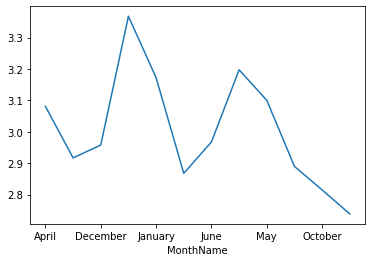

In [ ]:
#lazard.groupby(['MonthName'])
month_averages = [rfq.groupby(['MonthName']).aggregate({"DlrsCmp":np.mean})]
#mitsubishi.groupby(['MonthName', 'DlrsCmp']).max()

rfq.groupby(['MonthName'])['DlrsCmp'].mean().plot()  


In [ ]:
real.dab = real[real['Customer'] == 'DANSKE BANK A/S']

fig = px.box(lazard, x="MonthName", y="DlrsCmp", title="LAZARD ASSET MANAGEMENT <br>Dealers in competition pr. month", hover_data=rfq.groupby(['MonthName']).aggregate({"DlrsCmp":np.mean}), facet_col="Customer", facet_col_wrap=6)
fig.update_xaxes(categoryorder='array', categoryarray= ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.update_yaxes(range=[0,6],tick0=0, dtick=1)

fig.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
fig = px.box(ap, x="MonthName", y="DlrsCmp", title="AP Pension <br>Dealers in competition pr. month", hover_data=rfq.groupby(['MonthName']).aggregate({"DlrsCmp":np.mean}), facet_col="Customer", facet_col_wrap=6)
fig.update_xaxes(categoryorder='array', categoryarray= ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.update_yaxes(range=[0,6],tick0=0, dtick=1)

fig.show()

NameError: ignored

In [ ]:
print(pd.unique(real.dab['DlrsCmp']))
len(real.dab[~real.dab['DlrsCmp'].isin([1,2,3,4,5,6,])])

print(pd.unique(real.seb['DlrsCmp']))
len(real.seb[~real.seb['DlrsCmp'].isin([1,2,3,4,5,6,])])



**Yield compared to Buy/Sell**

In [ ]:

fig = px.scatter(real, x="Yield", y="Side", color="Status", size='Quantity',
                 hover_data=['Security', 'Customer', 'Price','Side', 'DlrsCmp'], title="RFQ (Yield vs Side)", facet_col="Customer", facet_col_wrap=6,
                 color_discrete_sequence=["green", "red", "yellow", "red", "yellow", "green", "red", "red", "red", "red", "green", "green"])

#fig.update_yaxes(dtick=0.1)
fig.update_xaxes(showgrid=True, ticks="outside", tickson="boundaries", range=[-1,3], dtick=0.25)
fig.update_yaxes(showgrid=True, range=['[S]','[B]'], dtick=0)

fig.show()


**Is the distance to midprice differe compared to status**

In [ ]:
fig = px.scatter(real, x="Quantity", y="DlrsCmp", color="Status", size='Quantity',
                 hover_data=['Security', 'Customer', 'Price','Side', 'DlrsCmp'], title="RFQ (Yield vs Side)", facet_col="Customer", facet_col_wrap=6,
                 color_discrete_sequence=["green", "red", "yellow", "red", "yellow", "green", "red", "red", "red", "red", "green", "green"])

#fig.update_yaxes(dtick=0.1)
fig.update_xaxes(showgrid=True, ticks="outside", tickson="boundaries", range=[-1,3], dtick=0.25)
fig.update_yaxes(showgrid=True, range=['[S]','[B]'], dtick=0)

fig.show()


In [ ]:
fig = px.scatter(real, x="Status", y="PriceDiff", color="Status", hover_data=['Security', 'Price', 'CBBT Mid Prc', 'Customer', 'Price','Side', 'DlrsCmp'], title="(Quoted Price – CBT Mid). Price diff > 10 has been removed",
                  color_discrete_sequence=["green", "yellow", "yellow", "red", "yellow", "green", "red", "red", "red", "red", "green", "red"], facet_col="Customer", facet_col_wrap=6)
fig.update_xaxes(categoryorder='array', categoryarray= ['Accepted', 'AllocAcpt', 'AllocSent', 'Covered', 'Tie-TW', 'TrAway', 'C/Expire', 'D/Expire']
                 )
#rfq['CBTMidPrice'].fillna(0, inplace=False)
#color_discrete_sequence=["green", "green", "green", "yellow", "yellow", "red", "red", "red", "red", "red", "red"]

fig.show()

In [ ]:
fig = px.box(real, x="Status", y="Rspns Time MS", color="Status", title="Lazard (Rspns Time MS)", facet_col="Customer", facet_col_wrap=6,
             color_discrete_sequence=["green", "yellow", "red", "red", "yellow", "green", "red", "red", "red", "red", "green", "red"])
fig.update_xaxes(categoryorder='array', categoryarray= ['Accepted', 'AllocAcpt', 'AllocSent', 'Covered', 'Tie-TW', 'TrAway', 'C/Expire', 'D/Expire'])
fig.update_yaxes(showgrid=True, ticks="outside", tickson="boundaries", range=[0,150000], dtick=10000)
fig.show()

In [ ]:
#fig = px.box(rfq, x="Status", y="Rspns Time MS", hover_data=['Security','Customer', 'TS Book Name'], title="RFQ ")
#fig.update_xaxes(categoryorder='array', categoryarray= ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#fig.update_yaxes(range=[0,5],tick0=0, dtick=1)
#fig.show()

In [ ]:
#fig = px.box(rfq, x="TS Book Name", y="Rspns Time MS")
#fig.update_xaxes(categoryorder='array', categoryarray= ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#fig.update_yaxes(range=[0,5],tick0=0, dtick=1)
#fig.show()

In [ ]:
#fig = px.histogram(real, x = rfq['Rspns Time MS'], nbins=1000)
#fig.show()

In [ ]:
#Creating the waiting time for customers

#real['QuotingTime'] = real['Exec Time'].astype('datetime64[ns]') - real['Time'].astype('datetime64[ms]')

#x = rfq['DIFF2']

#x.fillna(1)

#x.isnull().values.sum()
#len(y)

#x.fillna(100, inplace=True)
#x.isnull().values.sum()

#fig = px.histogram(real, x = real['QuotingTime'], nbins=100)
#fig.show()



In [ ]:
#rfq['Exec Time']

rfq['ExecTime'] = pd.to_datetime(rfq['Exec Time']) 
rfq['AskTime'] = pd.to_datetime(rfq['Time'])
rfq['QuotingTime'] = (rfq['ExecTime'] - rfq['AskTime'])
 
rfq['QuotingTime'] = (rfq['QuotingTime'].dt.total_seconds()*1000)
rfq['WaitingTimeMS'] = rfq['QuotingTime'] - rfq['Rspns Time MS'] 


In [ ]:
#real = rfq[real['WaitingTime'] > 0]

real.mix = real[real['Customer'].isin(['UBS ASSET MANAGEMENT SWITZERLAND AG', 'SEB ASSET MANAGEMENT'])]

fig = px.histogram(real.mix, x = 'WaitingTimeMS', color="Status", hover_data=['Security', 'Customer', 'Price','Side', 'DlrsCmp'], nbins=400, facet_col="Customer", facet_col_wrap=6,
                   title="Waiting Time Ms:<br>(Execution Time - RFQ Time) - Rspns Time <br>", 
                   color_discrete_sequence=["green", "yellow", "red", "red", "green", "red", "green", "red", "red", "yellow", "red", "red"])

fig.update_yaxes(showgrid=True, ticks="outside", tickson="boundaries", range=[0,80], dtick=10)

fig.add_shape(type="line",
    x0=4999, y0=0, x1=5000, y1=80, row=0 , col=1,
    line=dict(color="Black",width=1)
)

fig.add_shape(type="line",
    x0=9999, y0=0, x1=10000, y1=80, row=0 , col=1,
    line=dict(color="Black",width=1)
)

fig.add_shape(type="line",
    x0=19999, y0=0, x1=20000, y1=80, row=0 , col=1,
    line=dict(color="Black",width=1)
)

fig.add_shape(type="line",
    x0=4999, y0=0, x1=5000, y1=80, row=0 , col=2,
    line=dict(color="Black",width=1)
)

fig.add_shape(type="line",
    x0=9999, y0=0, x1=10000, y1=80, row=0 , col=2,
    line=dict(color="Black",width=1)
)

fig.add_shape(type="line",
    x0=19999, y0=0, x1=20000, y1=80, row=0 , col=2,
    line=dict(color="Black",width=1)
)



fig.show()

#fig = px.histogram(mit2, x = mit2['DIFF4'], nbins=100, marginal="box", color="Customer")




In [ ]:
#rfq['Exec Time']

ap['ExecTime'] = pd.to_datetime(ap['Exec Time']) 
ap['AskTime'] = pd.to_datetime(ap['Time'])
ap['QuotingTime'] = (ap['ExecTime'] - ap['AskTime'])
 
ap['QuotingTime'] = (ap['QuotingTime'].dt.total_seconds()*1000)
ap['WaitingTimeMS'] = ap['QuotingTime'] - ap['Rspns Time MS']

In [ ]:


fig = px.histogram(ap, x = 'WaitingTimeMS', color="Status", hover_data=['Security', 'Customer', 'Price','Side', 'DlrsCmp'], nbins=12, facet_col="Customer", facet_col_wrap=6,
                   title="Waiting Time Ms:<br>(Execution Time - RFQ Time) - Rspns Time <br>", 
                   color_discrete_sequence=["Yellow", "red", "green", "green"])

fig.add_shape(type="line",
    x0=9999, y0=0, x1=10000, y1=80, row=0 , col=1,
    line=dict(color="Black",width=1)
)

fig.add_shape(type="line",
    x0=4999, y0=0, x1=5000, y1=80, row=0 , col=1,
    line=dict(color="Black",width=1)
)

fig.update_yaxes(showgrid=True, ticks="outside", tickson="boundaries", range=[0,15], dtick=10)


fig.show()


In [ ]:
fig = px.box(rfq, x="Status", y="WaitingTimeMS", color="Status", title="Box plot (Waiting Time MS)", facet_col="Customer", facet_col_wrap=6,
             color_discrete_sequence=["green", "yellow", "red", "red", "yellow", "green", "red", "red", "red", "red", "green", "red"])
fig.update_xaxes(categoryorder='array', categoryarray= ['Accepted', 'AllocAcpt', 'AllocSent', 'Covered', 'Tie-TW', 'TrAway', 'C/Expire', 'D/Expire'])
fig.update_yaxes(showgrid=True, ticks="outside", tickson="boundaries", range=[0,150000], dtick=10000)
fig.show()

In [ ]:

fig = px.histogram(real, x = real['WaitingTimeMS'], hover_data=['Security', 'Price','Side', 'DlrsCmp','CBBT Bid Prc','CBBT Mid Prc', 'CBBT Ask Prc'], color="Status", nbins=500, facet_col="Customer", facet_col_wrap=3,
                   title="Waiting time ", 
                   color_discrete_sequence=["green", "yellow", "red", "red", "yellow", "green", "red", "red", "red", "red", "green", "red"], opacity = 0.2)

fig.show()


In [ ]:
fig = px.histogram(real, x = real['PriceDiff'], hover_data=['Security', 'Price','Side', 'DlrsCmp','CBBT Bid Prc','CBBT Mid Prc', 'CBBT Ask Prc'], color="Status", nbins=500, facet_col="Customer", facet_col_wrap=6,
                   title="Price Distribution from CBBT Mid <br>Negative x-values indicates non-inverted prices. Positive values indicates inverted prices.<br> ", 
                   color_discrete_sequence=["green", "yellow", "red", "red", "yellow", "green", "red", "red", "red", "red", "green", "red"], opacity = 0.2)


# Set axes ranges
fig.update_xaxes(range=[-0.5, 0.5])
fig.update_yaxes(range=[0, 25])

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=100, row=1 , col=1,
    line=dict(color="Black",width=4)
)

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=100, row=0 , col=1,
    line=dict(color="Black",width=4)
)

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=100, row=0 , col=2,
    line=dict(color="Black",width=4)
)

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=100, row=0 , col=3,
    line=dict(color="Black",width=4)
)

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=100, row=1 , col=2,
    line=dict(color="Black",width=4)
)


fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=100, row=1 , col=3,
    line=dict(color="Black",width=4)
)


#fig.add_shape(
#    dict(type="line", x0=-2, y0=12, x1=2, y1=20), row=1, col=1, line=dict(color="Black",width=3)
#)


fig.show()

In [ ]:
real = rfq[rfq['TS Book Name'].isin(['REAL'])]

real_acc = real[real['Status'].isin(['AllocSent', 'Accepted'])]
real_cov = real[real['Status'].isin(['Tie-TW', 'Covered'])]
real_notacc = real[real['Status'].isin(['TrAway', 'Passed', 'C/Expire', 'D/Expire', 'Rejected', 'Cancel'])]
real_notacc = real[real['PriceDiff'] < 6]
#real_acc = accepted[accepted['TS Book Name'].isin(['REAL'])]
#real_Nacc = accepted[accepted['TS Book Name'].isin(['ILLIKVID'])]

real_2 = [real_acc['PriceDiff'].dropna().tolist(), real_notacc['PriceDiff'].dropna().tolist(), real_cov['PriceDiff'].dropna().tolist()]

import plotly.figure_factory as ff
import numpy as np


In [ ]:
group_labels = ['REAL Accepted', 'REAL NOT Accepted', 'REAL Covered / Tie']


# Create distplot with custom bin_size
fig = ff.create_distplot(real_2, group_labels, bin_size=[.01, .01, .01]
                   )

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=13, 
    
    line=dict(color="red",width=2)
)

fig.update_layout(title='REAL Book <br>Side B: CBBT Mid Prc - Price<br>Side S: Price - CBBT Mid Prc')

fig.update_xaxes(range=[-1.5,1.5],tick0=0, dtick=0.1)
fig.update_xaxes(showgrid=True)

#fig.show()


#rfq.loc[rfq['Side'] == '[B]', 'PriceDiff'] = (rfq['CBBT Mid Prc'] - rfq['Price']) 
#rfq.loc[rfq['Side'] == '[S]', 'PriceDiff'] = (rfq['Price'] - rfq['CBBT Mid Prc'])



In [ ]:
all = rfq[rfq['Status'].isin(['AllocSent', 'Accepted', 'AllocAcpt'])]


all_stat = all[all['TS Book Name'].isin(['STAT'])]
all_real = all[all['TS Book Name'].isin(['REAL'])]
all_flex = all[all['TS Book Name'].isin(['FLEX'])]
all_ill = all[all['TS Book Name'].isin(['ILLIKVID'])]
#all_float = all[all['TS Book Name'] < 6]
#real_acc = accepted[accepted['TS Book Name'].isin(['REAL'])]
#real_Nacc = accepted[accepted['TS Book Name'].isin(['ILLIKVID'])]

all_2 = [all_stat['PriceDiff'].dropna().tolist(), all_real['PriceDiff'].dropna().tolist(), all_flex['PriceDiff'].dropna().tolist(), all_ill['PriceDiff'].dropna().tolist()]

In [ ]:
group_labels = ['Stat', 'REAL', 'FLEX', 'ILLIKVID']


# Create distplot with custom bin_size
fig = ff.create_distplot(all_2, group_labels, bin_size=[.01, .01, .01, 0.01]
                   )

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=37, 
    
    line=dict(color="red",width=2)
)

fig.update_layout(title='Price Diff for all acceptede trades on all books <br>Side B: CBBT Mid Prc - Price<br>Side S: Price - CBBT Mid Prc')

fig.update_xaxes(range=[-1.5,1.5],tick0=0, dtick=0.1)

fig.update_xaxes(showgrid=True)



#fig.show()


In [ ]:
#real = rfq[rfq['TS Book Name'].isin(['REAL'])]

ap_acc = ap[ap['Status'].isin(['AllocSent', 'Accepted'])]
ap_cov = ap[ap['Status'].isin(['Tie-TW', 'Covered'])]
ap_notacc = ap[ap['Status'].isin(['TrAway', 'Passed', 'C/Expire', 'D/Expire', 'Rejected', 'Cancel'])]
ap_notacc = ap[ap['PriceDiff'] < 6]
#real_acc = accepted[accepted['TS Book Name'].isin(['REAL'])]
#real_Nacc = accepted[accepted['TS Book Name'].isin(['ILLIKVID'])]

ap_2 = [ap_acc['PriceDiff'].dropna().tolist(), ap_notacc['PriceDiff'].dropna().tolist(), ap_cov['PriceDiff'].dropna().tolist()]

import plotly.figure_factory as ff
import numpy as np

In [ ]:
group_labels = ['All Accepted', 'All NOT Accepted', 'All Covered / Tie']


# Create distplot with custom bin_size
fig = ff.create_distplot(ap_2, group_labels, bin_size=[.1, .1, .1]
                   )

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=20, 
    
    line=dict(color="red",width=2)
)

fig.update_layout(title='AP Pension All Books <br>Side B: CBBT Mid Prc - Price<br>Side S: Price - CBBT Mid Prc')

fig.update_xaxes(range=[-1,1.5],tick0=0, dtick=0.1)
fig.update_xaxes(showgrid=True)

#fig.show()


#rfq.loc[rfq['Side'] == '[B]', 'PriceDiff'] = (rfq['CBBT Mid Prc'] - rfq['Price']) 
#rfq.loc[rfq['Side'] == '[S]', 'PriceDiff'] = (rfq['Price'] - rfq['CBBT Mid Prc'])

In [ ]:
real.groupby(['Customer','Status2', 'PriceDiffDummy'])['Quantity'].count()

In [ ]:
fig = px.pie(real, values='Quantity', names='Status2', title='Quantity pr Status', color='Status2', 
             color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow'
                                 })
fig.show()

In [ ]:
import plotly.express as px

fig = px.sunburst(lazard, path=['TS Book Name', 'Status2', 'PriceDiffDummy'], values='Quantity', title='Lazard Status & Book', color='Status2',
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow',
                                 '(?)': 'BLUE',
                                 'STAT': 'Black'
                                 }
                                 )
fig.show()

In [ ]:
stat = rfq[rfq['TS Book Name'].isin(['STAT'])]

fig = px.sunburst(stat, path=[ 'Status2', 'PriceDiffDummy'], values='Quantity', title='STAT Quantity pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                      'Non-Inverted':'green',
                                 'Accepted':'green',
                                 'Covered':'yellow',
                                  'Inverted':'red'
                                  
                                 })
fig.show()

**ENDS HERE**

In [ ]:
daiwa = rfq[rfq['Customer'] == 'DAIWA ASSET MANAGEMENT CO. LTD']

fig = px.sunburst(lazard, path=[ 'Status2', 'PriceDiffDummy'], values='Quantity', title='Daiwa pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Accepted/Inverted':'red',
                                 'Covered':'yellow'
                                 })
fig.show()


In [ ]:
ubs = rfq[rfq['Customer'] == 'UBS ASSET MANAGEMENT SWITZERLAND AG']

fig = px.sunburst(lazard, path=[ 'Status2', 'PriceDiffDummy'], values='Quantity', title='LAZARD pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow'
                                 })
fig.show()



In [ ]:
nordea = rfq[rfq['Customer'] == 'NORDEA INVESTMENT MANAGEMENT AB']

fig = px.sunburst(nordea, path=[ 'Status2', 'PriceDiffDummy'], values='Quantity', title='Nordea pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow'
                                 })
fig.show()

In [ ]:
skandia = rfq[rfq['Customer'] == 'SKANDIA ASSET MGMT FONDSMGLERS A/S']

fig = px.sunburst(skandia, path=[ 'Status2', 'PriceDiffDummy'], values='Quantity', title='Skandia pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow'
                                 })
fig.show()

In [ ]:
fig = px.box(skandia, x="MonthName", y="DlrsCmp",  hover_data=rfq.groupby(['MonthName']).aggregate({"DlrsCmp":np.mean}), facet_col="Customer", facet_col_wrap=6)
fig.update_xaxes(categoryorder='array', categoryarray= ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig.update_yaxes(range=[0,6],tick0=0, dtick=1)

fig.show()

In [ ]:
inverted = rfq[rfq['PriceDiffDummy'] == 'Inverted']

fig = px.sunburst(inverted, path=[ 'Status2', 'TS Book Name'], values='Quantity', title='Skandia pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow'
                                 })
fig.show()

In [ ]:
fig = px.sunburst(rfq, path=[ 'Status2', 'TS Book Name', 'PriceDiffDummy'], values='Quantity', title='Skandia pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow'
                                 })
fig.show()

In [ ]:
fig = px.sunburst(real, path=[ 'Status2',  'PriceDiffDummy', 'Customer'], values='Quantity', title='Skandia pr Status', color='Status2', 
                  color_discrete_map={'TrAway':'red',
                                 'Accepted':'green',
                                 'Covered':'yellow'
                                 })
fig.show()

In [ ]:
import plotly.express as px
import numpy as np

fig = px.treemap(lazard, path=['TS Book Name', 'Status2', 'PriceDiffDummy'], values='Quantity',
                  color='Status2', hover_data=['Customer'])
fig.show()


In [ ]:
import plotly.express as px
import numpy as np

fig = px.treemap(real, path=['Status2', 'PriceDiffDummy','Customer'], values='Quantity',
                  color='Customer', hover_data=['Customer'])
fig.show()

In [ ]:



fig = px.treemap(inverted, path=['TS Book Name', 'Status2', 'Customer'], values='Quantity',
                  color='Status2', hover_data=['Customer'])
fig.show()

In [ ]:
lazard_real = lazard[lazard['TS Book Name'] == 'REAL']

fig = px.treemap(lazard_real, path=['TS Book Name', 'Status2', 'PriceDiffDummy'], values='Quantity',
                  color='Customer', hover_data=['Customer'])
fig.show()


In [ ]:
inverted_real_laz = lazard_real[lazard_real['Status2'] == 'Accepted']

fig = px.treemap(inverted_real_laz, path=['TS Book Name', 'Status2', 'PriceDiffDummy'], values='Quantity',
                  color='Customer', hover_data=['Customer'])
fig.show()

In [ ]:



all_stat = rfq[rfq['TS Book Name'].isin(['STAT'])]
all_real = rfq[rfq['TS Book Name'].isin(['REAL'])]
all_flex = rfq[rfq['TS Book Name'].isin(['FLEX'])]
all_ill = rfq[rfq['TS Book Name'].isin(['ILLIKVID'])]
#all_float = all[rfq['TS Book Name'] < 6]
#real_acc = accepted[accepted['TS Book Name'].isin(['REAL'])]
#real_Nacc = accepted[accepted['TS Book Name'].isin(['ILLIKVID'])]

all_2 = [all_stat['WaitingTimeMS'].dropna().tolist(), all_real['WaitingTimeMS'].dropna().tolist(), all_flex['WaitingTimeMS'].dropna().tolist(), all_ill['WaitingTimeMS'].dropna().tolist()]

In [ ]:
group_labels = ['Stat', 'REAL', 'FLEX', 'ILLIKVID']


# Create distplot with custom bin_size
fig = ff.create_distplot(all_2, group_labels, bin_size=[.1, .1, .1, 0.01]
                   )

fig.add_shape(type="line",
    x0=0, y0=0, x1=0, y1=37, 
    
    line=dict(color="red",width=2)
)

fig.update_layout(title='Price Diff for all acceptede trades on all books <br>Side B: CBBT Mid Prc - Price<br>Side S: Price - CBBT Mid Prc')

fig.update_xaxes(range=[-15,15],tick0=0, dtick=0.1)

fig.update_xaxes(showgrid=True)



#fig.show()
